Import necessary modules.

In [55]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

%matplotlib inline

Helper methods.

In [56]:
cricket_data = pd.read_csv('datacsv.csv')
cricket_data = cricket_data.drop(columns=['Unnamed: 0'], axis=1)
aus_data = (cricket_data[cricket_data['currentInning.team.shortName'] == 'AUS']).sort_values(by=['over'])
scot_data = (cricket_data[cricket_data['currentInning.team.shortName'] == 'SCOT']).sort_values(by=['over'])
print(len(scot_data) + len(aus_data))
print(len(cricket_data))

552
552


In [57]:
# TODO: add methods for bowlers-wickets
# TODO: add methods for partnership
# TODO: manhattan plot

def get_player_runs(data):

    # Get Innings
    innings = data['currentInning.team.shortName'].unique()
    # Initialize
    innings_player_runs = pd.DataFrame(columns=['team','batsmen','runs'])
    for inning in innings:
        inning_data = (cricket_data[data['currentInning.team.shortName'] == inning]).sort_values(by=['over'])
        batsmen_runs = pd.DataFrame(columns=['name', 'runs'])
        # Fill the data frame
        for batsmen in inning_data['currentBatsmen']:
            batsmen = json.loads(batsmen.replace("\'", "\""))
            curr_batsmen_name = batsmen[0]['name']
            curr_batsmen_runs = batsmen[0]['runs']
            batsmen_runs = batsmen_runs.append({
                'name': curr_batsmen_name,
                'runs': curr_batsmen_runs
            }, ignore_index=True)

        # Get the player names
        player_names = batsmen_runs['name'].unique()
        # Fill the dictionary
        for player in player_names:
            innings_player_runs = innings_player_runs.append({
                'team': inning,
                'batsmen': player,
                'runs': ((batsmen_runs[batsmen_runs['name'] == player])['runs']).max()
            }, ignore_index=True)
        _ = sns.barplot(x = innings_player_runs[innings_player_runs['team'] == inning]['batsmen'], y = innings_player_runs[innings_player_runs['team'] == inning]['runs'])
        _.set_title(f"{inning}: Batsmen - Runs")
        _.set_xticklabels(labels=innings_player_runs[innings_player_runs['team'] == inning]['batsmen'], rotation=60)
        plt.show()

    # Return the dictionary
    return innings_player_runs


def get_bowler_stats(data):

    # Get Innings
    innings = data['currentInning.team.shortName'].unique()
    # Initialize
    innings_bowlers_stats = pd.DataFrame(columns=['team','bowler','overs', 'maidens', 'runs', 'wickets'])
    for inning in innings:
        inning_data = (data[data['currentInning.team.shortName'] == inning]).sort_values(by=['over'])
        bowlers_stats = pd.DataFrame(columns=['name', 'overs', 'maidens', 'runs', 'wickets'])
        # Fill the data frame
        for bowler in inning_data['currentBowlers']:
            bowler = json.loads(bowler.replace("\'", "\""))
            curr_bowler_name = bowler[0]['name']
            curr_bowler_overs = bowler[0]['overs']
            curr_bowler_maidens = bowler[0]['maidens']
            curr_bowler_runs = bowler[0]['runs']
            curr_bowler_wickets = bowler[0]['wickets']
            bowlers_stats = bowlers_stats.append({
                'name': curr_bowler_name,
                'overs': curr_bowler_overs,
                'maidens': curr_bowler_maidens,
                'runs': curr_bowler_runs,
                'wickets': curr_bowler_wickets
            }, ignore_index=True)

        # Get the player names
        player_names = bowlers_stats['name'].unique()
        # Fill the dictionary
        for player in player_names:
            innings_bowlers_stats = innings_bowlers_stats.append({
                'team': inning,
                'bowler': player,
                'overs': ((bowlers_stats[bowlers_stats['name'] == player])['overs']).max(),
                'maidens': ((bowlers_stats[bowlers_stats['name'] == player])['maidens']).max(),
                'runs': ((bowlers_stats[bowlers_stats['name'] == player])['runs']).max(),
                'wickets': ((bowlers_stats[bowlers_stats['name'] == player])['wickets']).max()
            }, ignore_index=True)

        f, axes = plt.subplots(2, 2)
        f.set_size_inches(30, f.get_figheight(), forward=True)

        f.suptitle(f'{inning} - Bowler Stats')

        _ = sns.barplot(x= innings_bowlers_stats[innings_bowlers_stats['team'] == inning]['bowler'],
                        y= innings_bowlers_stats[innings_bowlers_stats['team'] == inning]['overs'],
                        ax=axes[0, 0])
        axes[0, 0].set_title('Overs')
        axes[0, 0].set_xticklabels(labels=innings_bowlers_stats[innings_bowlers_stats['team'] == inning]['bowler'], rotation=60)

        _ = sns.barplot(x= innings_bowlers_stats[innings_bowlers_stats['team'] == inning]['bowler'],
                        y= innings_bowlers_stats[innings_bowlers_stats['team'] == inning]['maidens'],
                        ax=axes[0, 1])
        axes[0, 1].set_title('Maidens')
        axes[0, 1].set_xticklabels(labels=innings_bowlers_stats[innings_bowlers_stats['team'] == inning]['bowler'], rotation=60)

        _ = sns.barplot(x= innings_bowlers_stats[innings_bowlers_stats['team'] == inning]['bowler'],
                        y= innings_bowlers_stats[innings_bowlers_stats['team'] == inning]['runs'],
                        ax=axes[1,0])
        axes[1, 0].set_title('Runs')
        axes[1, 0].set_xticklabels(labels=innings_bowlers_stats[innings_bowlers_stats['team'] == inning]['bowler'], rotation=60)

        _ = sns.barplot(x= innings_bowlers_stats[innings_bowlers_stats['team'] == inning]['bowler'],
                        y= innings_bowlers_stats[innings_bowlers_stats['team'] == inning]['wickets'],
                        ax=axes[1,1])
        axes[1, 1].set_title('Wickets')
        axes[1, 1].set_xticklabels(labels=innings_bowlers_stats[innings_bowlers_stats['team'] == inning]['bowler'], rotation=60)

    return innings_bowlers_stats


def get_inning_runs(data):

    # Get Innings
    innings = data['currentInning.team.shortName'].unique()
    total_runs = pd.DataFrame(columns=['team', 'total runs'])
    for inning in innings:
        total_runs = total_runs.append({
            'team': inning,
            'total runs': data[data['currentInning.team.shortName'] == inning]['currentInning.runs'].max()
        }, ignore_index=True)
    _ = sns.barplot(x='team', y='total runs', data=total_runs)
    _.set_title(f"{innings[0]} vs {innings[1]}")
    plt.show()
    return total_runs

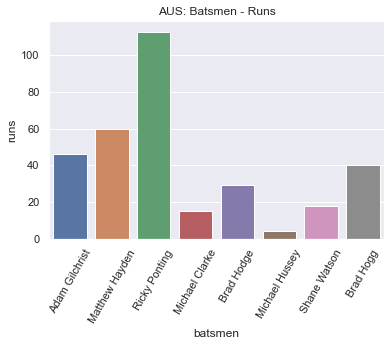

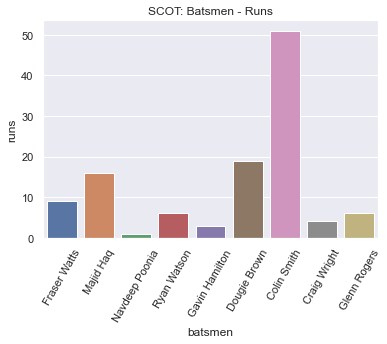

    team         batsmen runs
0    AUS  Adam Gilchrist   46
1    AUS  Matthew Hayden   60
2    AUS   Ricky Ponting  113
3    AUS  Michael Clarke   15
4    AUS      Brad Hodge   29
5    AUS  Michael Hussey    4
6    AUS    Shane Watson   18
7    AUS       Brad Hogg   40
8   SCOT    Fraser Watts    9
9   SCOT       Majid Haq   16
10  SCOT  Navdeep Poonia    1
11  SCOT     Ryan Watson    6
12  SCOT  Gavin Hamilton    3
13  SCOT    Dougie Brown   19
14  SCOT     Colin Smith   51
15  SCOT    Craig Wright    4
16  SCOT    Glenn Rogers    6
   team total runs
0   AUS        334
1  SCOT        131


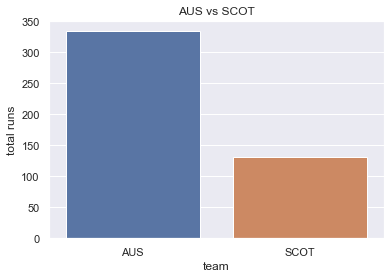

In [58]:
player_runs = get_player_runs(cricket_data)
print(player_runs)

match_team_scores = get_inning_runs(cricket_data)
print(match_team_scores)

    team          bowler  overs maidens runs wickets
0    AUS   Paul Hoffmann   10.0       0   57       1
1    AUS      John Blain    4.0       0   29       0
2    AUS    Craig Wright   10.0       0   58       1
3    AUS    Dougie Brown    9.0       0   86       1
4    AUS    Glenn Rogers   10.0       0   52       1
5    AUS       Majid Haq    7.0       0   49       2
6   SCOT  Nathan Bracken    6.0       1   12       0
7   SCOT      Shaun Tait    8.0       0   45       2
8   SCOT   Glenn McGrath    6.0       1   14       3
9   SCOT    Shane Watson    7.0       1   18       0
10  SCOT       Brad Hogg    7.1       1   16       1
11  SCOT      Brad Hodge    6.0       0   17       1


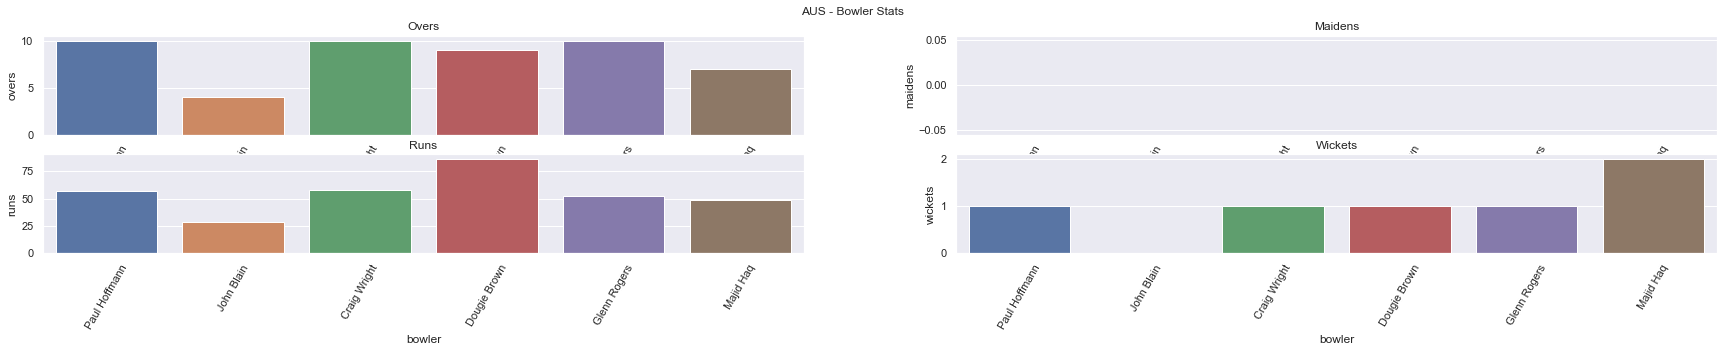

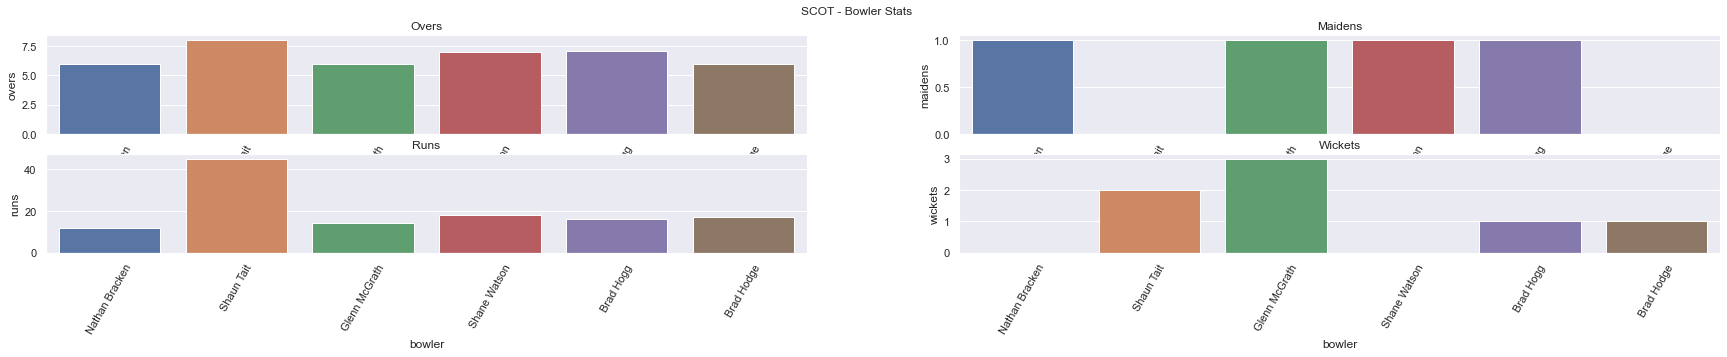

In [59]:
bowling_stats = get_bowler_stats(cricket_data)
print(bowling_stats)